# Face Detection with OpenCV

This project utilized OpenCV to detect faces in images using a [trained](https://github.com/opencv/opencv/tree/master/data/haarcascades) [Haar-cascade classifier](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html), drawing a bounding box around each detected face and saving all the results. It was created for academic purposes.

Credits to [Alura's Technology school](https://cursos.alura.com.br/formacao-visao-computacional-opencv) for the Computer Vision courses

## Importing libs

In [1]:
import cv2
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from os.path import isfile, join

## Defining Functions

#### img_reader: read image and returns in rgb and gray scale

In [2]:
def img_reader(img_dir):
    img_rgb = cv2.cvtColor(cv2.imread(img_dir), cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(cv2.imread(img_dir), cv2.COLOR_BGR2RGB)
    return img_rgb, img_gray

#### face_detection: detect faces using Haar-cascade classifier and returns all positions

In [3]:
def face_detection(img, scaleFactor, minNeighbors):
    bp_classifier = cv2.CascadeClassifier('Classificadores/haarcascade_frontalface_default.xml')
    faces = bp_classifier.detectMultiScale(img, scaleFactor, minNeighbors)
    return faces

#### bounding_box: draws a bounding box on the regions of interest

In [5]:
def bounding_box(img, pos, color = (255,0,0), t = 3):
    for (x,y,w,h) in pos:
        cv2.rectangle(img,(x,y),(x+w, y+h),color,t)
    return img

#### save_roi: save all regions of interest (faces) in the specified directory

In [6]:
def save_roi(img, pos, path, fileName = 'img'):
    count = 0
    for (x,y,w,h) in pos:
        count += 1
        roi = cv2.cvtColor(img[y:y+h, x:x+w], cv2.COLOR_RGB2BGR)
        cv2.imwrite(path + fileName + str(count) + '.png', roi)
    return 'OK'

#### read_dir: read the specified directory and returns all files into a list

In [7]:
def read_dir(path):
    lstFaces = [f for f in listdir(path) if isfile(join(path, f))]
    return lstFaces

#### plot_lst: plot all images of a list using matplotlib.pyplot

In [8]:
def plot_lst(path,lstImgs, s=(18,8)):
    r,c,x,y = round(len(lstImgs)/10)+1, 10, 0, 0
    fig, ax = plt.subplots(r, c)
    fig.set_size_inches(s)
    
    for imgP in lstImgs:
        img, _ = img_reader(path + imgP)
        ax[x][y].axis('off')
        ax[x][y].imshow(img)
        y+=1
        if (y==10):
            y = 0
            x+=1
    #cleaning the remaining axes
    while (x!=r-1) or (y!=c):
        ax[x][y].axis('off')
        y+=1
        if (y==10):
            y = 0
            x+=1
        if (x==r):
            break

## Detecting faces

#### Reading an example image from a monastery, detecting faces and drawing bounding boxes around their faces.

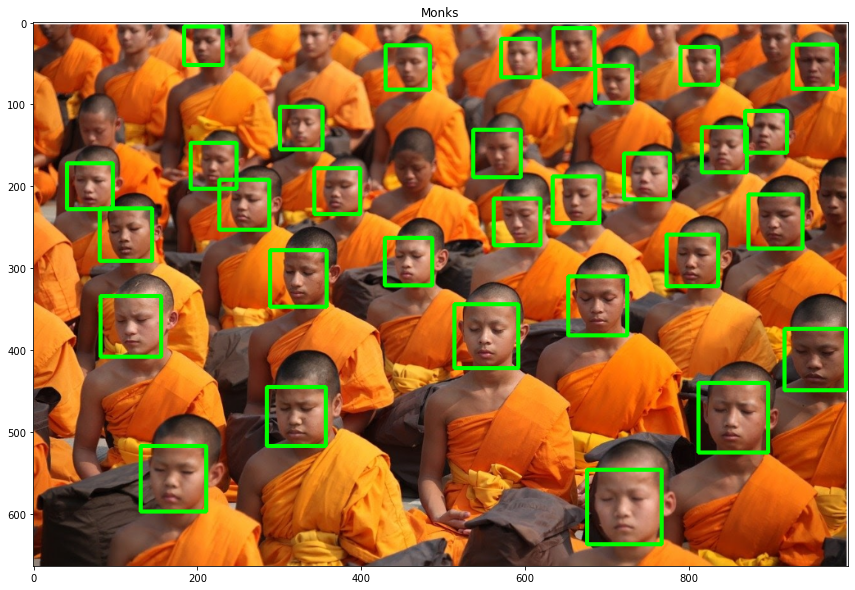

In [9]:
img_rgb, img_gray = img_reader('Imagens/1364-img0201.png')
faces = face_detection(img_gray, 1.05, 5)

img = img_rgb.copy()
img = bounding_box(img, faces, (0,255,0))

plt.figure(figsize=(15,10))
plt.title('Monks')
plt.imshow(img)

## Saving images of detected faces

In [10]:
path = "Imagens/detected-faces/"
img_name = 'Monk'
save_roi(img_rgb, faces, path, img_name)


'OK'

## Reading all images saved previously and plotting using matplotlib.pyplot

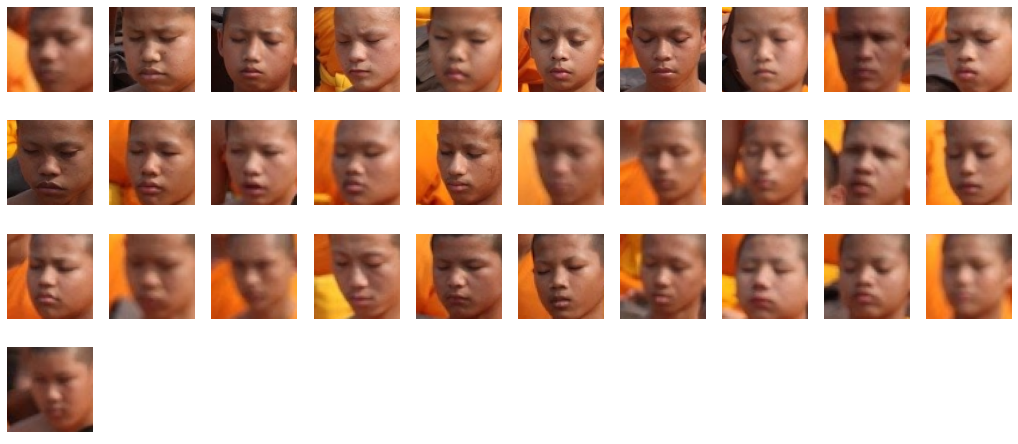

In [11]:
lstImgs = read_dir(path)
plot_lst(path, lstImgs)